In [250]:
import yaml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin, OneToOneFeatureMixin
from sklearn.pipeline import Pipeline
import seaborn as sns
from numpy.typing import NDArray
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [251]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,id
0,Aakash,Male,47,Agra,Working Professional,Teacher,NaN,1.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,B.Arch,Yes,11,5,Yes,0,1
1,Asha,Female,25,Chennai,Student,NaN,3.0,NaN,6.59,1.0,NaN,7-8 hours,Healthy,BSc,No,9,3,No,0,2
2,Samar,Male,56,Indore,Working Professional,Data Scientist,NaN,3.0,NaN,NaN,2.0,7-8 hours,Moderate,B.Tech,No,2,4,Yes,0,3
3,Chhavi,Female,24,Kalyan,Student,NaN,2.0,NaN,5.77,2.0,NaN,5-6 hours,Moderate,MBBS,Yes,5,3,No,1,4
4,Anand,Male,55,Kanpur,Working Professional,Researcher,NaN,1.0,NaN,NaN,2.0,7-8 hours,Unhealthy,BSc,Yes,4,4,No,0,5


In [252]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,id
0,Raghav,Male,59,Kolkata,Working Professional,Content Writer,NaN,1.0,NaN,NaN,1.0,Less than 5 hours,Healthy,ME,No,10,1,No,1
1,Shlok,Male,45,Indore,Working Professional,Plumber,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,PhD,Yes,0,1,Yes,2
2,Saurav,Male,42,Nagpur,Working Professional,Digital Marketer,NaN,3.0,NaN,NaN,4.0,5-6 hours,Healthy,M.Com,No,12,2,Yes,3
3,Dhruv,Male,34,Lucknow,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,7-8 hours,Unhealthy,B.Com,No,12,5,No,4
4,Shreya,Female,36,Kolkata,Working Professional,Plumber,NaN,4.0,NaN,NaN,2.0,7-8 hours,Moderate,BE,Yes,7,3,Yes,5


In [253]:
cat_df = train_df.select_dtypes(include=['object'])
num_df = train_df.select_dtypes(exclude=['object'])

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 20 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   1891 non-null   object 
 1   Gender                                 1891 non-null   object 
 2   Age                                    1891 non-null   int64  
 3   City                                   1891 non-null   object 
 4   Working Professional or Student        1891 non-null   object 
 5   Profession                             1380 non-null   object 
 6   Academic Pressure                      382 non-null    float64
 7   Work Pressure                          1509 non-null   float64
 8   CGPA                                   382 non-null    float64
 9   Study Satisfaction                     382 non-null    float64
 10  Job Satisfaction                       1509 non-null   float64
 11  Slee

In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Name                                   665 non-null    object 
 1   Gender                                 665 non-null    object 
 2   Age                                    665 non-null    int64  
 3   City                                   665 non-null    object 
 4   Working Professional or Student        665 non-null    object 
 5   Profession                             503 non-null    object 
 6   Academic Pressure                      120 non-null    float64
 7   Work Pressure                          545 non-null    float64
 8   CGPA                                   120 non-null    float64
 9   Study Satisfaction                     120 non-null    float64
 10  Job Satisfaction                       545 non-null    float64
 11  Sleep 

Удалим столбец Name так как не содержит полезной информации для прогноза депрессии

In [256]:
train_df.drop(['Name'], axis=1, inplace=True)
test_df.drop(['Name'], axis=1, inplace=True)

Обработка пропусков

In [257]:
nan_df = (train_df.isnull().mean() * 100).reset_index()
nan_df.columns = ['column_name', 'percentage']
nan_df.sort_values('percentage', ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
8,Study Satisfaction,79.799048
7,CGPA,79.799048
5,Academic Pressure,79.799048
4,Profession,27.022739
9,Job Satisfaction,20.200952
6,Work Pressure,20.200952
0,Gender,0.000000
2,City,0.000000
1,Age,0.000000
3,Working Professional or Student,0.000000


Но стоит ли удалять данные, с пропусками больше 70%? CGPA(средний балл), Study Satisfaction(удовлетворенность учебой), Academic Pressure (уровень учебной нагрузки) - все 3 признака могут очень сильно влиять на депрессию. Поэтому лучше заполнить эти столбцы

In [258]:
cat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   Name                                   1891 non-null   object
 1   Gender                                 1891 non-null   object
 2   City                                   1891 non-null   object
 3   Working Professional or Student        1891 non-null   object
 4   Profession                             1380 non-null   object
 5   Sleep Duration                         1891 non-null   object
 6   Dietary Habits                         1891 non-null   object
 7   Degree                                 1891 non-null   object
 8   Have you ever had suicidal thoughts ?  1891 non-null   object
 9   Family History of Mental Illness       1891 non-null   object
dtypes: object(10)
memory usage: 147.9+ KB


In [259]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1891 entries, 0 to 1890
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1891 non-null   int64  
 1   Academic Pressure   382 non-null    float64
 2   Work Pressure       1509 non-null   float64
 3   CGPA                382 non-null    float64
 4   Study Satisfaction  382 non-null    float64
 5   Job Satisfaction    1509 non-null   float64
 6   Work/Study Hours    1891 non-null   int64  
 7   Financial Stress    1891 non-null   int64  
 8   Depression          1891 non-null   int64  
 9   id                  1891 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 147.9 KB


Заполним пропуски в числовых признаках нулями, а в категориальных признаках заполним N/A

In [260]:
train_df['Profession'] = train_df['Profession'].fillna('NA')
test_df['Profession'] = test_df['Profession'].fillna('NA')

In [261]:
num = ['Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', ]
for col in num:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

In [262]:
num_df = train_df.select_dtypes(include=['int64', 'float64'])

Проверим коррелирующие признаки

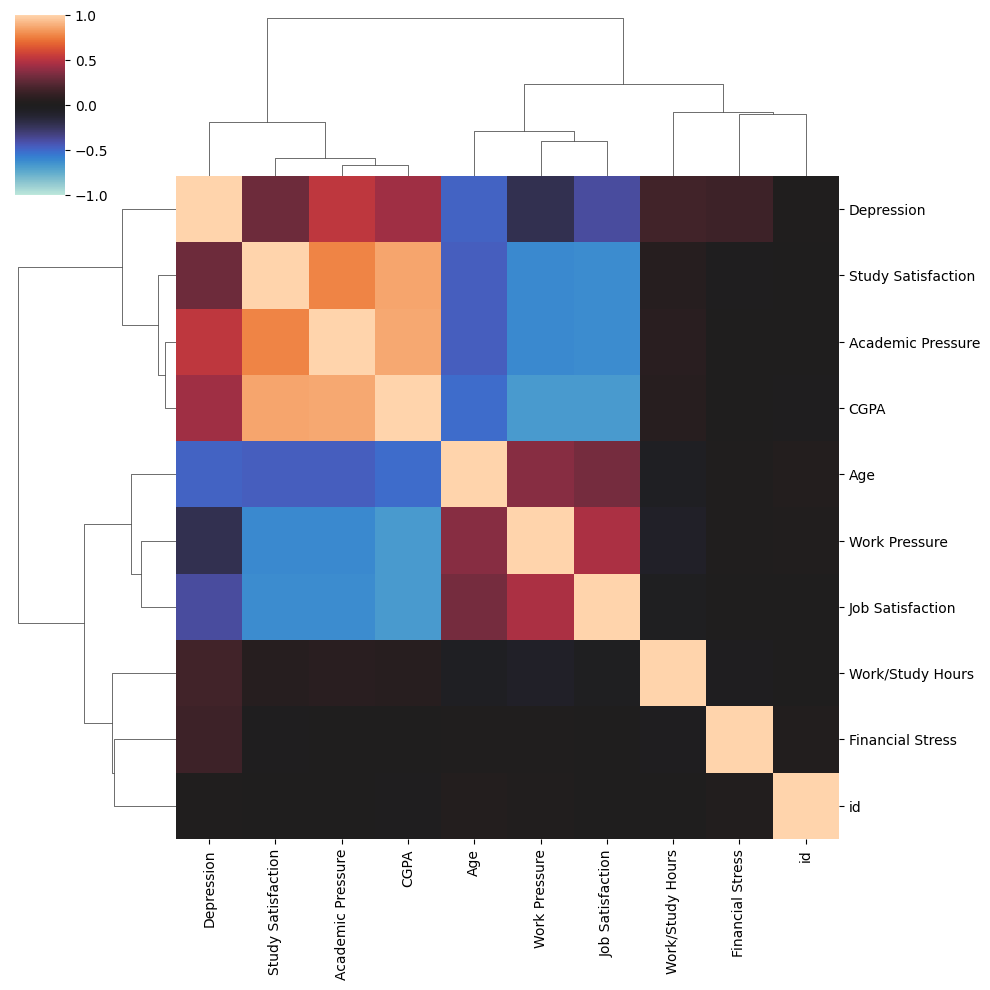

In [263]:
def corrplot(df, method="pearson", annot=True, **kwargs):
    sns.clustermap(
        df.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )


corrplot(num_df, annot=None)

In [264]:
correlation_matrix = num_df.corr()
correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['feature1', 'feature2', 'correlation']

correlation_pairs = correlation_pairs[
    (correlation_pairs['feature1'] != correlation_pairs['feature2'])
].drop_duplicates()

high_corr_pairs = correlation_pairs[correlation_pairs['correlation'] > 0.75]
print(f"Найдено пар с корреляцией > 0.75: {len(high_corr_pairs)}")

high_corr_pairs.sort_values('correlation', ascending=False).head(10)

Найдено пар с корреляцией > 0.75: 6


,feature1,feature2,correlation
13,Academic Pressure,CGPA,0.874394
31,CGPA,Academic Pressure,0.874394
43,Study Satisfaction,CGPA,0.865114
34,CGPA,Study Satisfaction,0.865114
14,Academic Pressure,Study Satisfaction,0.771814
41,Study Satisfaction,Academic Pressure,0.771814


Удаляем признак CGPA, так как при удалении других признаков результат F1-score сильно падает. Хоть и CGPA важна для предсказания, но высокая коррелляция и пропуски оправдывает это действие

In [265]:
train_df.drop(['CGPA'], axis=1, inplace=True)
test_df.drop(['CGPA'], axis=1, inplace=True)

Проверим на наличие выбросов

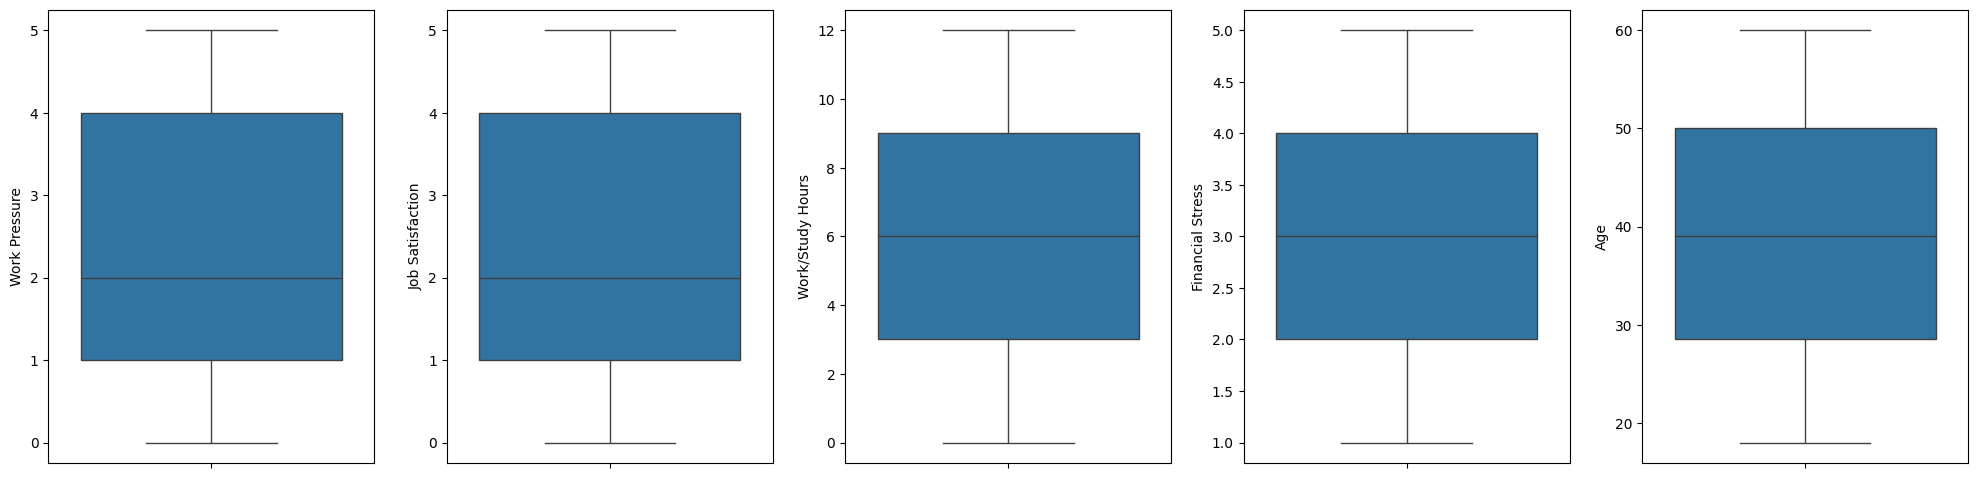

In [266]:
out_col = ['Work Pressure', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Age']

fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=train_df[col], data=train_df, ax=ax)
fig.tight_layout(pad=1.5)

Проверим пропуски

In [267]:
print("Пропуски в train_df:", train_df.isnull().sum())
print("Пропуски в test_df:", test_df.isnull().sum())

Пропуски в train_df: Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
id                                       0
dtype: int64
Пропуски в test_df: Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0


Обучение

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import f1_score

X = train_df.drop(['id', 'Depression'], axis=1) 
y = train_df['Depression']

numeric_features = X.select_dtypes(exclude=['object']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist'), categorical_features)
    ])

model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(penalty='l1', C=1.0, solver='liblinear', max_iter=1000, random_state=42))
])
# Разделение данных (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

model.fit(X_train, y_train)

valid_pred = model.predict(X_valid)
valid_f1 = f1_score(y_valid, valid_pred, average='weighted')
print(f"Validatoin F1-score: {valid_f1:.4f}")

test_pred = model.predict(X_test)
test_f1 = f1_score(y_test, test_pred, average='weighted')
print(f"Test F1-score: {test_f1:.4f}")

# Предсказание на тестовых данных
test_predictions = model.predict(test_df.drop(['id'], axis=1))

results = pd.DataFrame({
    'id': test_df['id'],          
    'depression': test_predictions  
})

#results.to_csv('predictions4.csv', index=False)

Validatoin F1-score: 0.9947
Test F1-score: 0.9921


Сравним результаты моделей: logistic regression, knn, svm, decision trees,random forests. Лучший результат остаётся с логистической регрессией, останавливаемся на этом варианте.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

numeric_features = X_train.select_dtypes(exclude=['object']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='infrequent_if_exist'), categorical_features)
    ])

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}

for name, model in models.items():
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    score = f1_score(y_test, y_pred, average='weighted')
    print(f"{name}: F1-score = {score:.4f}")

Logistic Regression: F1-score = 0.9894
KNN: F1-score = 0.9020
SVM: F1-score = 0.9621
Decision Tree: F1-score = 0.8951
Random Forest: F1-score = 0.8894
